# Predicting Pulsar Stars
![](https://everydayastronaut.com/wp-content/uploads/2019/03/neutronstarj.jpg)

Most neutron stars are observed as pulsars. Pulsars are rotating neutron stars observed to have pulses of radiation at very regular intervals that typically range from milliseconds to seconds. Pulsars have very strong magnetic fields which funnel jets of particles out along the two magnetic poles. These accelerated particles produce very powerful beams of light. Often, the magnetic field is not aligned with the spin axis, so those beams of particles and light are swept around as the star rotates. When the beam crosses our line-of-sight, we see a pulse – in other words, we see pulsars turn on and off as the beam sweeps over Earth.

One way to think of a pulsar is like a lighthouse. At night, a lighthouse emits a beam of light that sweeps across the sky. Even though the light is constantly shining, you only see the beam when it is pointing directly in your direction. The video below is an animation of a neutron star showing the magnetic field rotating with the star. Partway through, the point-of-view changes so that we can see the beams of light sweeping across our line of sight – this is how a pulsar pulses.

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Tuning
from sklearn.model_selection import GridSearchCV

# validation
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.pipeline import Pipeline

# Prerocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')
%matplotlib inline




df = pd.read_csv('../input/pulsar_stars.csv')
df.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Exploratory Data Analysis

In [2]:
pp.ProfileReport(df)

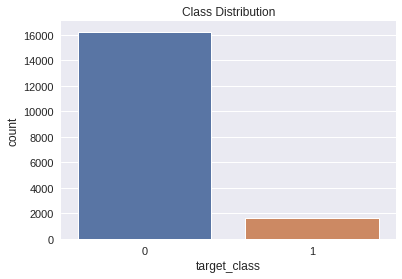

In [3]:
sns.countplot(x='target_class', data=df)
plt.title('Class Distribution');

In [4]:
X = df.drop('target_class', axis=1)
y = df.target_class

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=0)


# Models


In [5]:
pipelines = []
pipelines.append(( ' ScaledLR ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LR ' ,
LogisticRegression())])))
pipelines.append(( ' ScaledLDA ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LDA ' ,
LinearDiscriminantAnalysis())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
KNeighborsClassifier())])))
pipelines.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RandomForest ' ,
RandomForestClassifier())])))
pipelines.append(( ' ScaledNB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' NB ' ,
GaussianNB())])))
pipelines.append(( ' ScaledSVM ' , Pipeline([( ' Scaler' , StandardScaler()),( ' SVM ' , SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledLR : 0.978528 (0.004183)
 ScaledLDA : 0.975016 (0.004639)
 ScaledKNN : 0.978050 (0.004255)
 ScaledRF : 0.978688 (0.003958)
 ScaledNB : 0.943567 (0.006608)
 ScaledSVM : 0.978688 (0.004162)


# Logistic Regression

In [6]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logis = LogisticRegression().fit(X_train,y_train)
y_pred = logis.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9798882681564246


### We have imbalanced classes but this model predicting not just the majority 

In [7]:
print(np.unique(y_pred))

[0 1]


In [8]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4982
           1       0.82      0.93      0.87       388

    accuracy                           0.98      5370
   macro avg       0.91      0.96      0.93      5370
weighted avg       0.98      0.98      0.98      5370



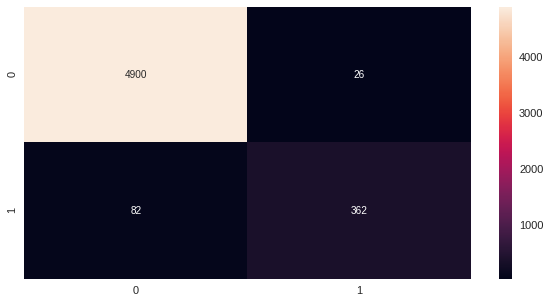

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f');

# Improve Result with Tuning

In [10]:

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

grid = GridSearchCV(LogisticRegression(), hyperparameters, cv=10, verbose=0)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 0.978847 using {'C': 1.0, 'penalty': 'l1'}


# Improve accuracy using ensemble methods

In [11]:
ensembles = []
ensembles.append(( ' ScaledAB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' AB ' ,
AdaBoostClassifier())])))
ensembles.append(( ' ScaledBG ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' AB ' ,
BaggingClassifier())])))
ensembles.append(( ' ScaledGBM ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' GBM ' ,
GradientBoostingClassifier())])))
ensembles.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RF ' ,
RandomForestClassifier())])))

                 
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledAB : 0.978289 (0.003147)
 ScaledBG : 0.978768 (0.003780)
 ScaledGBM : 0.977570 (0.005382)
 ScaledRF : 0.978369 (0.004013)


# Bagging

In [12]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
bagging = BaggingClassifier().fit(X_train,y_train)
y_pred = bagging.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9787709497206704


In [13]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4966
           1       0.83      0.91      0.87       404

    accuracy                           0.98      5370
   macro avg       0.91      0.95      0.93      5370
weighted avg       0.98      0.98      0.98      5370



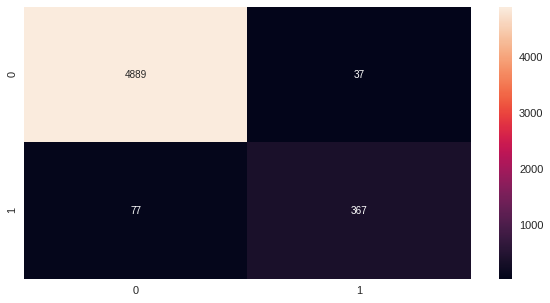

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f');